**Image Processing Assignment**
---
Name: Surendiran M <br/>
Register No: 2022103560 <br/>
Batch: CSE - P


1.Plot the normalized distribution of the above image. Also, Plot the distribution after equalization.


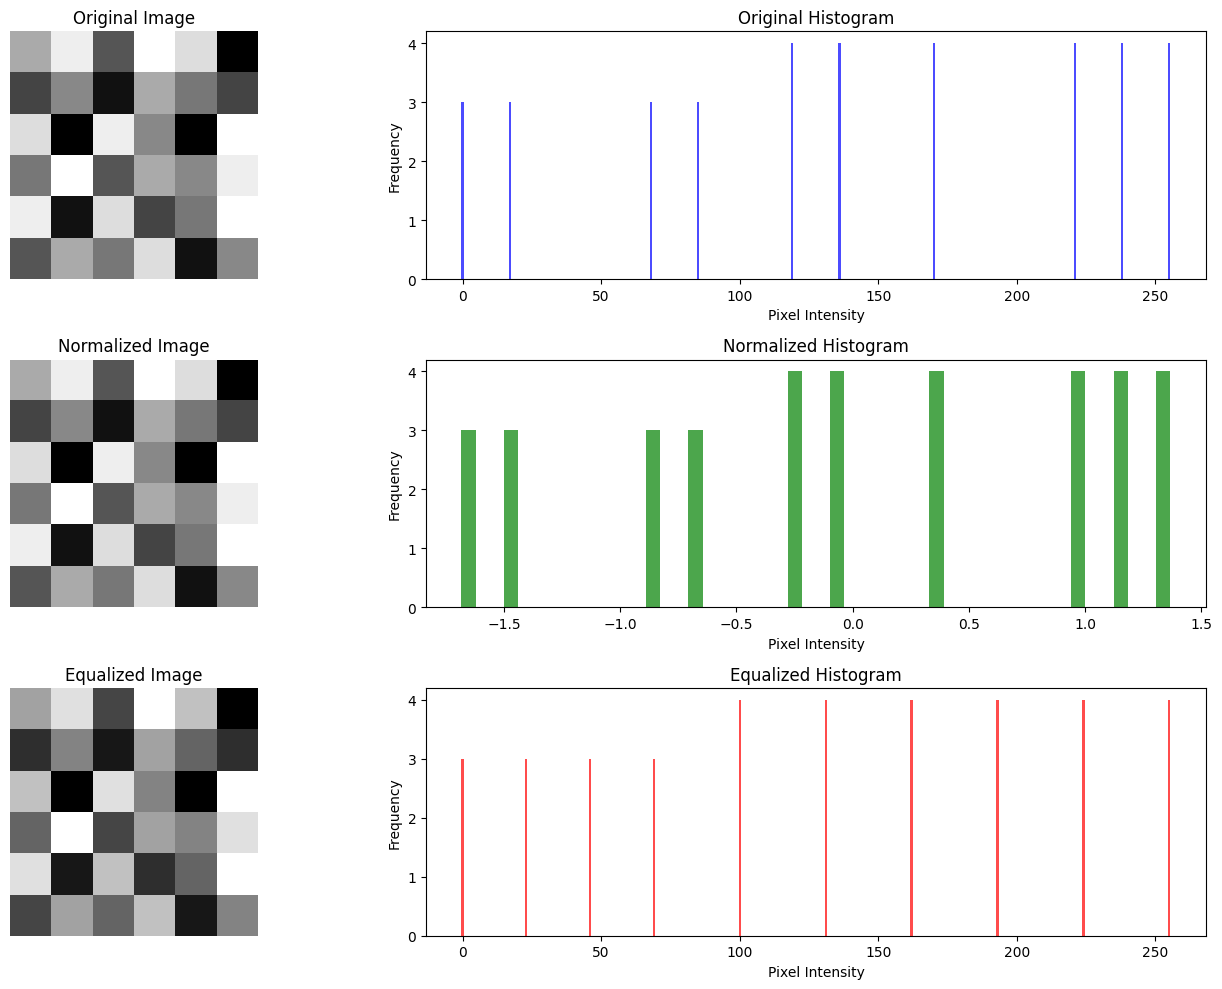

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_mean(image):
    total = sum(sum(row) for row in image)
    return total / (len(image) * len(image[0]))

def compute_std(image, mean):
    variance = sum(sum((pixel - mean) ** 2 for pixel in row) for row in image) / (len(image) * len(image[0]))
    return variance ** 0.5

def normalize_image(image):
    mean = compute_mean(image)
    std = compute_std(image, mean)
    return [[(pixel - mean) / std for pixel in row] for row in image]

def compute_histogram(image, bins=256):
    hist = [0] * bins
    for row in image:
        for pixel in row:
            hist[int(pixel)] += 1
    return hist

def compute_cdf(hist):
    cdf = [0] * len(hist)
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] = cdf[i - 1] + hist[i]
    return cdf

def histogram_equalization(image):
    flat_image = [pixel for row in image for pixel in row]
    hist = compute_histogram(image)
    cdf = compute_cdf(hist)
    cdf_min = next(cdf_val for cdf_val in cdf if cdf_val > 0)
    total_pixels = len(flat_image)

    equalized = [(cdf[pixel] - cdf_min) * 255 // (total_pixels - cdf_min) for pixel in flat_image]
    return np.array(equalized, dtype=np.uint8).reshape(len(image), len(image[0]))

image_matrix = np.array([
    [170, 238, 85, 255, 221, 0],
    [68, 136, 17, 170, 119, 68],
    [221, 0, 238, 136, 0, 255],
    [119, 255, 85, 170, 136, 238],
    [238, 17, 221, 68, 119, 255],
    [85, 170, 119, 221, 17, 136]
], dtype=np.int32)

normalized_image = np.array(normalize_image(image_matrix))
equalized_image = histogram_equalization(image_matrix)

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(image_matrix, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.bar(range(256), compute_histogram(image_matrix), color='blue', alpha=0.7)
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalized Image")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.hist(np.array(normalized_image).flatten(), bins=50, color='green', alpha=0.7)
plt.title("Normalized Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.bar(range(256), compute_histogram(equalized_image), color='red', alpha=0.7)
plt.title("Equalized Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Step 1: Normalize the Image <br/>
Step 2: Compute Histogram and CDF<br/>
Step 3: Perform Histogram Equalization<br/>
Step 4: Visualize Results<br/>


---



2.The relation between input (r) and output (s) pixels are given using, s = c. rY . If Y = r, then try to
produce the resultant image. Comment on your results.

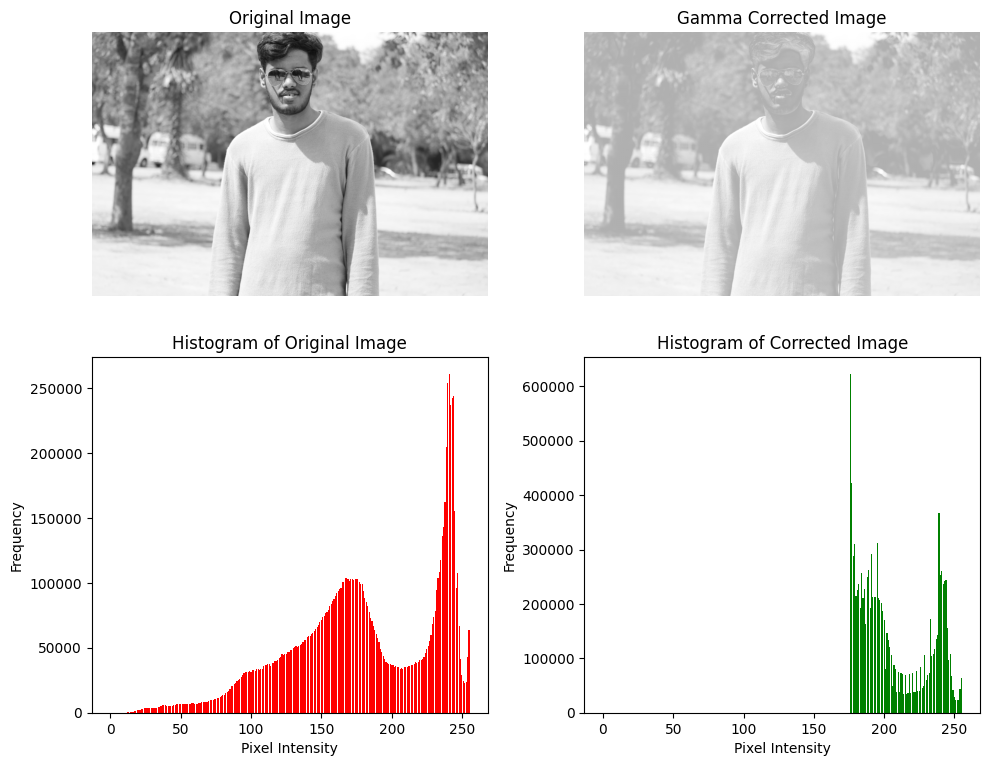

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gamma_correction(image_matrix, c=1):
    normalized_image = [[pixel / 255.0 for pixel in row] for row in image_matrix]
    gamma_values = normalized_image
    transformed_image = [[int(min(c * (pixel ** gamma) * 255, 255)) for pixel, gamma in zip(row, gamma_row)] for row, gamma_row in zip(normalized_image, gamma_values)]
    return transformed_image

image_path = '/content/Cool as a cucumber.jpeg'
image_matrix = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image_matrix is None:
    image_matrix = [
        [170, 238, 85, 255, 221, 0],
        [68, 136, 17, 170, 119, 68],
        [221, 0, 238, 136, 0, 255],
        [119, 255, 85, 170, 136, 238],
        [238, 17, 221, 68, 119, 255],
        [85, 170, 119, 221, 17, 136]
    ]

corrected_image = gamma_correction(image_matrix)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_matrix, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(corrected_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Gamma Corrected Image')

original_hist = [0] * 256
for row in image_matrix:
    for pixel in row:
        original_hist[pixel] += 1

corrected_hist = [0] * 256
for row in corrected_image:
    for pixel in row:
        corrected_hist[pixel] += 1

plt.subplot(2, 2, 3)
plt.bar(range(256), original_hist, color='red')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Original Image')

plt.subplot(2, 2, 4)
plt.bar(range(256), corrected_hist, color='green')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Corrected Image')

plt.tight_layout()
plt.show()

Step 1: Normalize the Image
Convert pixel values from the range [0, 255] to [0, 1] by dividing by 255.<br/>
Step 2: Apply Gamma Correction
Use the formula 𝑃' = 𝑃^𝛾, where 𝑃 is the normalized pixel value and 𝛾 is the gamma value.
This transformation adjusts brightness and contrast non-linearly.
Common gamma values:
𝛾 < 1 → Brightens the image.
𝛾 > 1 → Darkens the image.<br/>
Step 3: Rescale Pixel Values
Convert the adjusted pixel values back to [0, 255] by multiplying by 255.
Round and convert them to integers.<br/>
Step 4: Compute Histograms
Compute and plot histograms of both the original and gamma-corrected images.<br/>
Step 5: Visualize Results



---



3. Perform contrast stretching on your image of the passport size photo. Record the values of a, b, c, d
used for the operation. Next, perform the histogram equalization on the original image. Compare the
original picture and its histogram with the stretched picture and its histogram as well as with the
equalized picture and its histogram.


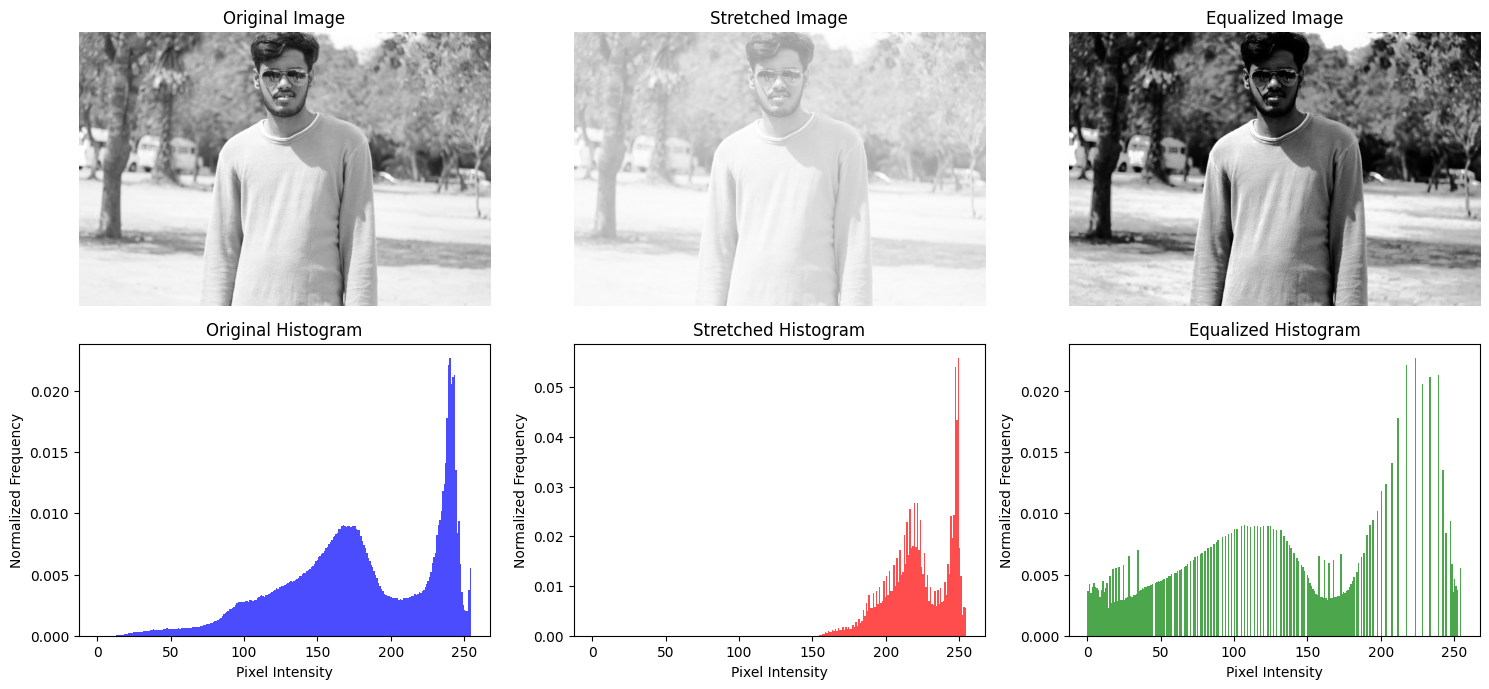

Contrast Stretching Parameters: r_min=0, r_max=255, s_min=150, s_max=255


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def find_min_max(image):
    min_val, max_val = 255, 0
    for row in image:
        for pixel in row:
            if pixel < min_val:
                min_val = pixel
            if pixel > max_val:
                max_val = pixel
    return min_val, max_val

def contrast_stretching(image, r_min, r_max, s_min, s_max):
    if r_max == r_min:
        return [[s_min for _ in row] for row in image]  #If image is uniform
    stretched_image = []
    for row in image:
        new_row = []
        for pixel in row:
            new_pixel = (pixel - r_min) * (s_max - s_min) / (r_max - r_min) + s_min
            new_row.append(int(min(max(new_pixel, s_min), s_max)))
        stretched_image.append(new_row)
    return stretched_image

def compute_histogram(image):
    hist = [0] * 256
    for row in image:
        for pixel in row:
            hist[pixel] += 1
    return hist

def compute_cdf(hist):
    cdf = [0] * len(hist)
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] = cdf[i - 1] + hist[i]
    return cdf

def histogram_equalization(image):
    hist = compute_histogram(image)
    cdf = compute_cdf(hist)

    cdf_min = min(cdf)
    total_pixels = cdf[-1]  # Total number of pixels
    equalized_map = [(cdf[p] - cdf_min) * 255 // (total_pixels - cdf_min) for p in range(256)]

    equalized_image = [[equalized_map[pixel] for pixel in row] for row in image]
    return equalized_image

image_path = '/content/Cool as a cucumber.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
else:
    image_list = image.tolist()

    r_min, r_max = find_min_max(image_list)
    s_min, s_max = 150, 255

    stretched_image = contrast_stretching(image_list, r_min, r_max, s_min, s_max)

    equalized_image = histogram_equalization(image_list)

    original_pixel_values = [pixel for row in image_list for pixel in row]
    stretched_pixel_values = [pixel for row in stretched_image for pixel in row]
    equalized_pixel_values = [pixel for row in equalized_image for pixel in row]

    plt.figure(figsize=(15, 7))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.hist(original_pixel_values, bins=256, range=(0, 255), density=True, color='blue', alpha=0.7)
    plt.title("Original Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Normalized Frequency")

    plt.subplot(2, 3, 2)
    plt.imshow(np.array(stretched_image, dtype=np.uint8), cmap='gray', vmin=0, vmax=255)
    plt.title("Stretched Image")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.hist(stretched_pixel_values, bins=256, range=(0, 255), density=True, color='red', alpha=0.7)
    plt.title("Stretched Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Normalized Frequency")

    plt.subplot(2, 3, 3)
    plt.imshow(np.array(equalized_image, dtype=np.uint8), cmap='gray', vmin=0, vmax=255)
    plt.title("Equalized Image")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.hist(equalized_pixel_values, bins=256, range=(0, 255), density=True, color='green', alpha=0.7)
    plt.title("Equalized Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Normalized Frequency")

    plt.tight_layout()
    plt.show()

    print(f"Contrast Stretching Parameters: r_min={r_min}, r_max={r_max}, s_min={s_min}, s_max={s_max}")


Step 1: Contrast Stretching<br/>
* Identify the minimum (r_min) and maximum (r_max) pixel values in the image.
* Apply the formula:
where s_min = 0 and s_max = 255.
* This stretches pixel values to cover the full intensity range, enhancing contrast.<br/>

Step 2: Compute Histogram and CDF<br/>
* Count how many times each pixel
intensity appears in the image (histogram).
* Compute the Cumulative Distribution Function (CDF) to understand pixel intensity distribution.<br/>

Step 3: Perform Manual Histogram Equalization <br/>
* Normalize the CDF to map pixel intensities to the full range (0-255).
* Replace each pixel with its new intensity based on the CDF transformation.
<br/>

Step 4: Visualize Results


---



4. A newspaper digitization company wants to extract clear text from old, faded newspapers for archiving.
The images contain uneven lighting, faded ink, and noise from the paper texture. Implement an image
enhancement techniques (i) adaptive histogram equalization to improve contrast, (ii) noise reduction
using a median filter, and (iii) binarization with Otsu’s thresholding to separate text from the
background, (iv) apply morphological operations to refine the text structure. As a final step, display a
before-and-after (for all the steps) comparison to evaluate the effectiveness of the preprocessing
techniques.

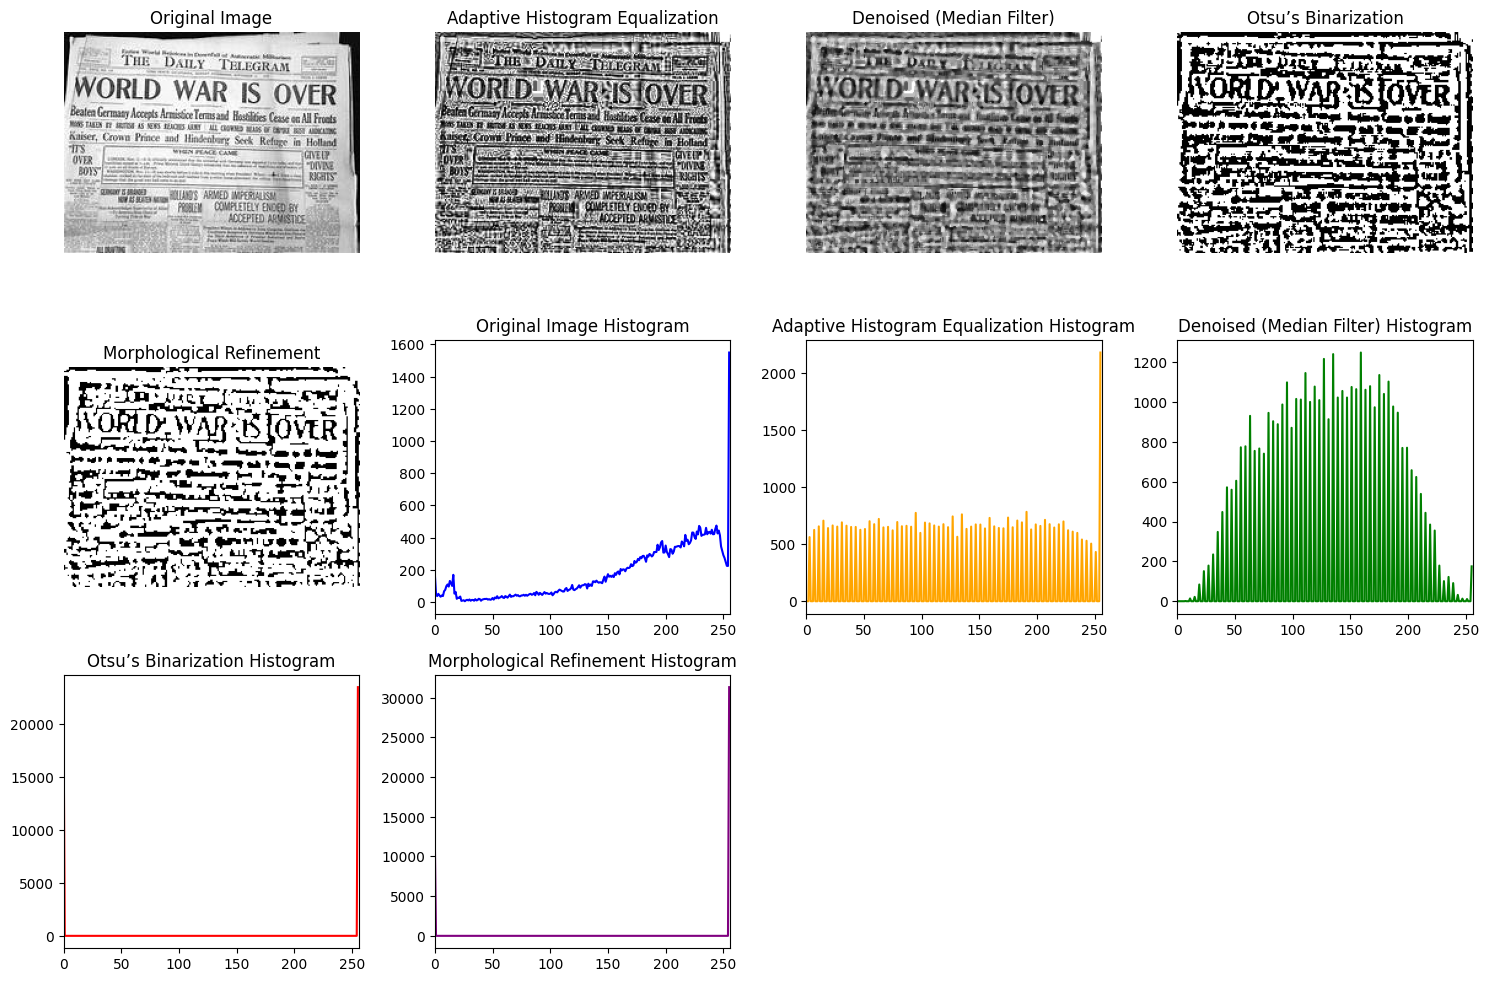

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image):
    hist = [0] * 256
    for row in image:
        for pixel in row:
            hist[pixel] += 1
    return hist

def plot_histogram(image, title, color):
    hist = compute_histogram(image)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(title)

def enhance_newspaper_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Image not found.")
        return

    def adaptive_histogram_equalization(image, clip_limit=2.0, tile_grid_size=(8, 8)):
        height, width = image.shape
        tile_h, tile_w = tile_grid_size
        new_image = np.zeros_like(image)
        for i in range(0, height, tile_h):
            for j in range(0, width, tile_w):
                tile = image[i:i+tile_h, j:j+tile_w]
                hist = compute_histogram(tile)
                cdf = np.cumsum(hist) / sum(hist)
                equalized_tile = np.interp(tile.flatten(), range(256), cdf * 255).reshape(tile.shape).astype(np.uint8)
                new_image[i:i+tile_h, j:j+tile_w] = equalized_tile
        return new_image

    enhanced_image = adaptive_histogram_equalization(image)

    def median_filter(image, kernel_size=3):
        pad = kernel_size // 2
        padded_image = np.pad(image, pad, mode='edge')
        new_image = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                new_image[i, j] = np.median(padded_image[i:i+kernel_size, j:j+kernel_size])
        return new_image

    denoised_image = median_filter(enhanced_image)

    def otsu_threshold(image):
        hist = compute_histogram(image)
        total_pixels = image.size
        sum_all = sum(i * hist[i] for i in range(256))
        sum_b, weight_b, max_var, threshold = 0, 0, 0, 0
        for i in range(256):
            weight_b += hist[i]
            if weight_b == 0:
                continue
            weight_f = total_pixels - weight_b
            if weight_f == 0:
                break
            sum_b += i * hist[i]
            mean_b = sum_b / weight_b
            mean_f = (sum_all - sum_b) / weight_f
            var_between = weight_b * weight_f * (mean_b - mean_f) ** 2
            if var_between > max_var:
                max_var = var_between
                threshold = i
        binary_image = (image >= threshold) * 255
        return binary_image.astype(np.uint8)

    binary_image = otsu_threshold(denoised_image)

    def morphological_close(image, kernel_size=(2, 2)):
        pad_h, pad_w = kernel_size[0] // 2, kernel_size[1] // 2
        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
        new_image = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = padded_image[i:i+kernel_size[0], j:j+kernel_size[1]]
                new_image[i, j] = np.max(region)
        return new_image

    morphed_image = morphological_close(binary_image)

    plt.figure(figsize=(15, 10))

    images = [image, enhanced_image, denoised_image, binary_image, morphed_image]
    titles = ["Original Image", "Adaptive Histogram Equalization", "Denoised (Median Filter)", "Otsu’s Binarization", "Morphological Refinement"]
    colors = ['blue', 'orange', 'green', 'red', 'purple']

    for i in range(5):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

        plt.subplot(3, 4, i + 6)
        plot_histogram(images[i], titles[i] + " Histogram", colors[i])

    plt.tight_layout()
    plt.show()

image_path = '/content/news-paper.jpeg'
enhance_newspaper_image(image_path)


Step 1: Adaptive Histogram Equalization <br/>
* Divide the image into small tiles of size tile_grid_size
Compute the histogram for each tile separately.
* Use the Cumulative Distribution Function (CDF) to equalize pixel intensities.
<br/>

Step 2: Noise Reduction using Median Filter <br/>
* Define a kernel size.
* Replace each pixel with the median value of its surrounding pixels.

Step 3: Binarization using Otsu’s Thresholding<br/>
* Compute the histogram of the denoised image.
* Use Otsu’s method to determine an optimal threshold.
* Convert the grayscale image into a binary image (0 or 255).
* This enhances the readability of text in the newspaper.

Step 4: Morphological Refinement<br/>
* Apply morphological closing using a small kernel.
* This operation fills small gaps and connects broken parts of text.

Step 5: Visualize Results


---

